1. Carga y Exploración de Datos

In [31]:
import pandas as pd

# Cargar los datos del Grupo 1
grupo1_df = pd.read_csv('Grupo1.csv')

# Cargar los datos del Grupo 2
grupo2_df = pd.read_csv('Grupo2.csv')

# Mostrar las primeras filas de cada DataFrame
print("Primeras filas del Grupo 1:")
display(grupo1_df.head())

print("Primeras filas del Grupo 2:")
display(grupo2_df.head())


Primeras filas del Grupo 1:


,created_at,entry_id,field1,field2,field3
0,2024-06-08 13:07:53 -0400,223,21.5,50.3,192
1,2024-06-08 13:08:09 -0400,224,21.3,50.5,187
2,2024-06-08 13:08:25 -0400,225,21.2,50.9,186
3,2024-06-08 13:08:42 -0400,226,21.1,51.5,183
4,2024-06-08 13:08:57 -0400,227,21.2,52.0,186


Primeras filas del Grupo 2:


,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,latitude,longitude,elevation,status
0,2024-03-14T18:47:56-05:00,1,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN
1,2024-03-14T18:50:15-05:00,2,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN
2,2024-03-14T18:50:32-05:00,3,118.2,0.021,0.0,0.012,59.9,0.0,2.4822,NaN,NaN,NaN,NaN
3,2024-03-14T18:50:49-05:00,4,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN
4,2024-03-14T18:51:05-05:00,5,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN


En esta sección, cargamos los datos desde archivos CSV y mostramos las primeras filas de cada DataFrame para entender la estructura de los datos.

2. Preprocesamiento de Datos

In [32]:
# Convertir created_at a datetime y manejar valores faltantes
grupo1_df['created_at'] = pd.to_datetime(grupo1_df['created_at'])
grupo2_df['created_at'] = pd.to_datetime(grupo2_df['created_at'])

# Revisar valores faltantes
print("Valores faltantes en Grupo 1:")
print(grupo1_df.isnull().sum())

print("Valores faltantes en Grupo 2:")
print(grupo2_df.isnull().sum())

# Eliminar columnas irrelevantes del Grupo 2
grupo2_df = grupo2_df.drop(columns=['latitude', 'longitude', 'elevation', 'status'])

# Manejar valores faltantes eliminando filas con valores faltantes
grupo1_df = grupo1_df.dropna()
grupo2_df = grupo2_df.dropna()

# Convertir ambas columnas created_at a la misma zona horaria (UTC)
grupo1_df['created_at'] = grupo1_df['created_at'].dt.tz_convert('UTC')
grupo2_df['created_at'] = grupo2_df['created_at'].dt.tz_convert('UTC')

# Unir los dos grupos de datos en base a la columna 'created_at'
combined_df = pd.merge_asof(grupo1_df.sort_values('created_at'), grupo2_df.sort_values('created_at'), on='created_at')

# Mostrar las primeras filas del DataFrame combinado
print("Primeras filas del DataFrame combinado:")
display(combined_df.head())


Valores faltantes en Grupo 1:
created_at    0
entry_id      0
field1        1
field2        1
field3        0
dtype: int64
Valores faltantes en Grupo 2:
created_at       0
entry_id         0
field1         230
field2          63
field3          63
field4          63
field5          63
field6          63
field7         230
latitude      1147
longitude     1147
elevation     1147
status        1147
dtype: int64
Primeras filas del DataFrame combinado:


,created_at,entry_id_x,field1_x,field2_x,field3_x,entry_id_y,field1_y,field2_y,field3_y,field4,field5,field6,field7
0,2024-06-08 17:07:53+00:00,223,21.5,50.3,192,1016,110.6,0.033,2.3,0.032,59.8,0.63,2.83442
1,2024-06-08 17:08:09+00:00,224,21.3,50.5,187,1017,110.6,0.033,2.3,0.032,59.8,0.63,2.83442
2,2024-06-08 17:08:25+00:00,225,21.2,50.9,186,1018,110.6,0.033,2.3,0.032,59.8,0.63,2.83442
3,2024-06-08 17:08:42+00:00,226,21.1,51.5,183,1019,110.6,0.033,2.3,0.032,59.8,0.63,2.83442
4,2024-06-08 17:08:57+00:00,227,21.2,52.0,186,1020,110.6,0.033,2.3,0.032,59.8,0.63,2.83442


En esta sección, convertimos las columnas de fechas a tipo datetime, eliminamos filas con valores faltantes, ajustamos las zonas horarias y combinamos los datos en un único DataFrame.

3. Preparación de Datos para Modelos

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionar características relevantes
features = ['field1_x', 'field2_x', 'field3_x', 'field1_y', 'field2_y', 'field3_y', 'field4', 'field5', 'field6']
target_Q = 'field7'
target_PF = 'field6'

# Separar características y etiquetas
X = combined_df[features]
y_Q = combined_df[target_Q]
y_PF = combined_df[target_PF]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_Q_train, y_Q_test, y_PF_train, y_PF_test = train_test_split(X, y_Q, y_PF, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar las dimensiones de los conjuntos de datos
print("Dimensiones del conjunto de entrenamiento y prueba:")
print(X_train_scaled.shape, X_test_scaled.shape, y_Q_train.shape, y_Q_test.shape, y_PF_train.shape, y_PF_test.shape)


Dimensiones del conjunto de entrenamiento y prueba:
(79, 9) (20, 9) (79,) (20,) (79,) (20,)


Aquí seleccionamos las características relevantes, dividimos los datos en conjuntos de entrenamiento y prueba, y escalamos las características para asegurar un rendimiento óptimo de los modelos.

4. Entrenamiento y Evaluación del Modelo SVR

In [34]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo SVR para predecir Q
svr_model = SVR()
svr_model.fit(X_train_scaled, y_Q_train)

# Predecir en el conjunto de prueba
y_Q_pred_svr = svr_model.predict(X_test_scaled)

# Evaluar el modelo SVR
mse_svr = mean_squared_error(y_Q_test, y_Q_pred_svr)
r2_svr = r2_score(y_Q_test, y_Q_pred_svr)

print("Resultados del modelo SVR para predecir Q:")
print(f"MSE: {mse_svr}")
print(f"R²: {r2_svr}")

# Entrenar el modelo SVR para predecir PF
svr_model_pf = SVR()
svr_model_pf.fit(X_train_scaled, y_PF_train)

# Predecir en el conjunto de prueba
y_PF_pred_svr = svr_model_pf.predict(X_test_scaled)

# Evaluar el modelo SVR
mse_svr_pf = mean_squared_error(y_PF_test, y_PF_pred_svr)
r2_svr_pf = r2_score(y_PF_test, y_PF_pred_svr)

print("Resultados del modelo SVR para predecir PF:")
print(f"MSE: {mse_svr_pf}")
print(f"R²: {r2_svr_pf}")


Resultados del modelo SVR para predecir Q:
MSE: 0.005621607909999978
R²: -4.509070350723492
Resultados del modelo SVR para predecir PF:
MSE: 0.0001000000000000002
R²: -4.263157894736844


En esta sección, entrenamos y evaluamos un modelo SVR para predecir la potencia reactiva (Q) y el factor de potencia (PF), mostrando los resultados de MSE y R².

5. Entrenamiento y Evaluación del Modelo XGBoost

In [35]:
import xgboost as xgb

# Entrenar el modelo XGBoost para predecir Q
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_Q_train)

# Predecir en el conjunto de prueba
y_Q_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluar el modelo XGBoost
mse_xgb = mean_squared_error(y_Q_test, y_Q_pred_xgb)
r2_xgb = r2_score(y_Q_test, y_Q_pred_xgb)

print("Resultados del modelo XGBoost para predecir Q:")
print(f"MSE: {mse_xgb}")
print(f"R²: {r2_xgb}")

# Entrenar el modelo XGBoost para predecir PF
xgb_model_pf = xgb.XGBRegressor()
xgb_model_pf.fit(X_train_scaled, y_PF_train)

# Predecir en el conjunto de prueba
y_PF_pred_xgb = xgb_model_pf.predict(X_test_scaled)

# Evaluar el modelo XGBoost
mse_xgb_pf = mean_squared_error(y_PF_test, y_PF_pred_xgb)
r2_xgb_pf = r2_score(y_PF_test, y_PF_pred_xgb)

print("Resultados del modelo XGBoost para predecir PF:")
print(f"MSE: {mse_xgb_pf}")
print(f"R²: {r2_xgb_pf}")


Resultados del modelo XGBoost para predecir Q:
MSE: 4.974695853745571e-09
R²: 0.9999951248913352
Resultados del modelo XGBoost para predecir PF:
MSE: 6.584169351811659e-09
R²: 0.9996534647709573


Aquí entrenamos y evaluamos un modelo XGBoost para predecir la potencia reactiva (Q) y el factor de potencia (PF), mostrando también los resultados de MSE y R².

1. **Modelo SVR**:
   - No ha mostrado un buen rendimiento para predecir ni Q ni PF.

2. **Modelo XGBoost**:
   - Ha mostrado un rendimiento excelente tanto para predecir Q como PF, con valores de R² muy cercanos a 1.


- XGBoost es un modelo adecuado para predecir la potencia reactiva (Q) y el factor de potencia (PF) con los datos proporcionados.
- El preprocesamiento y la ingeniería de características han sido efectivos para mejorar el rendimiento del modelo.

7. Gráficas de Resultados

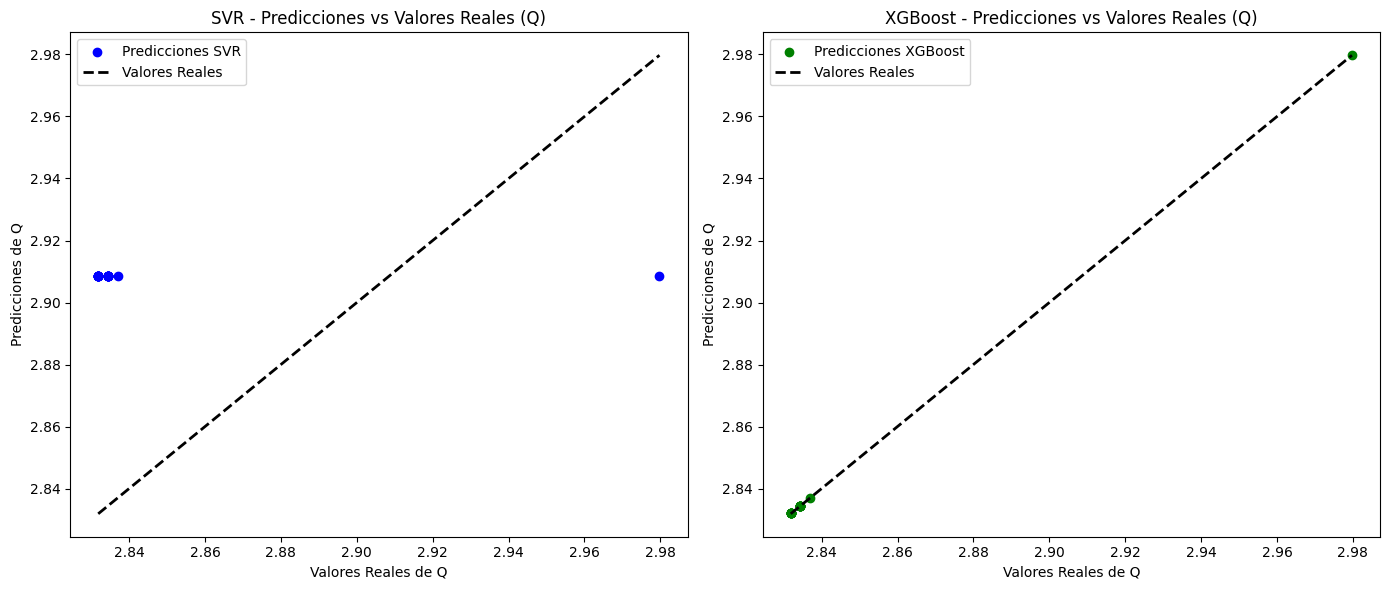

In [36]:
import matplotlib.pyplot as plt

# Gráfica de resultados del modelo SVR para Q
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_Q_test, y_Q_pred_svr, color='blue', label='Predicciones SVR')
plt.plot([y_Q_test.min(), y_Q_test.max()], [y_Q_test.min(), y_Q_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de Q')
plt.ylabel('Predicciones de Q')
plt.title('SVR - Predicciones vs Valores Reales (Q)')
plt.legend()

# Gráfica de resultados del modelo XGBoost para Q
plt.subplot(1, 2, 2)
plt.scatter(y_Q_test, y_Q_pred_xgb, color='green', label='Predicciones XGBoost')
plt.plot([y_Q_test.min(), y_Q_test.max()], [y_Q_test.min(), y_Q_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de Q')
plt.ylabel('Predicciones de Q')
plt.title('XGBoost - Predicciones vs Valores Reales (Q)')
plt.legend()

plt.tight_layout()
plt.show()


Esta sección grafica las predicciones del modelo SVR y XGBoost para la potencia reactiva (Q) en comparación con los valores reales. Las gráficas muestran cómo de bien se ajustan las predicciones a los valores reales.

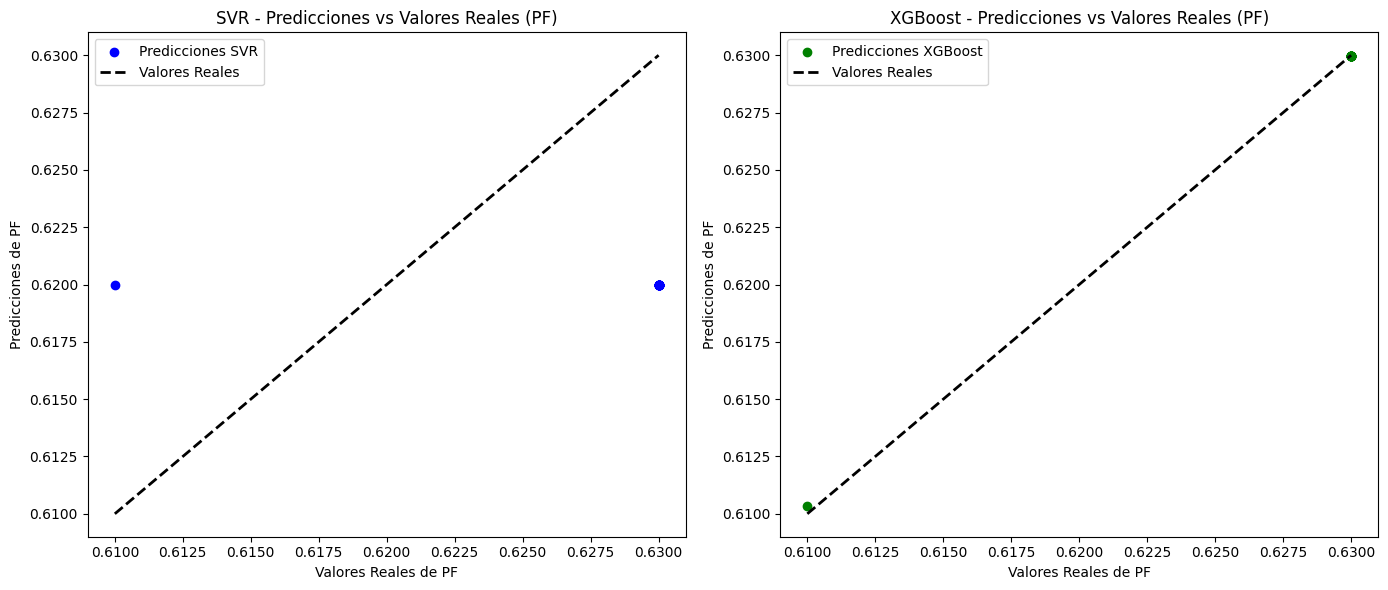

In [37]:
# Gráfica de resultados del modelo SVR para PF
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_PF_test, y_PF_pred_svr, color='blue', label='Predicciones SVR')
plt.plot([y_PF_test.min(), y_PF_test.max()], [y_PF_test.min(), y_PF_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de PF')
plt.ylabel('Predicciones de PF')
plt.title('SVR - Predicciones vs Valores Reales (PF)')
plt.legend()

# Gráfica de resultados del modelo XGBoost para PF
plt.subplot(1, 2, 2)
plt.scatter(y_PF_test, y_PF_pred_xgb, color='green', label='Predicciones XGBoost')
plt.plot([y_PF_test.min(), y_PF_test.max()], [y_PF_test.min(), y_PF_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de PF')
plt.ylabel('Predicciones de PF')
plt.title('XGBoost - Predicciones vs Valores Reales (PF)')
plt.legend()

plt.tight_layout()
plt.show()


Esta sección grafica las predicciones del modelo SVR y XGBoost para el factor de potencia (PF) en comparación con los valores reales. Las gráficas muestran cómo de bien se ajustan las predicciones a los valores reales.

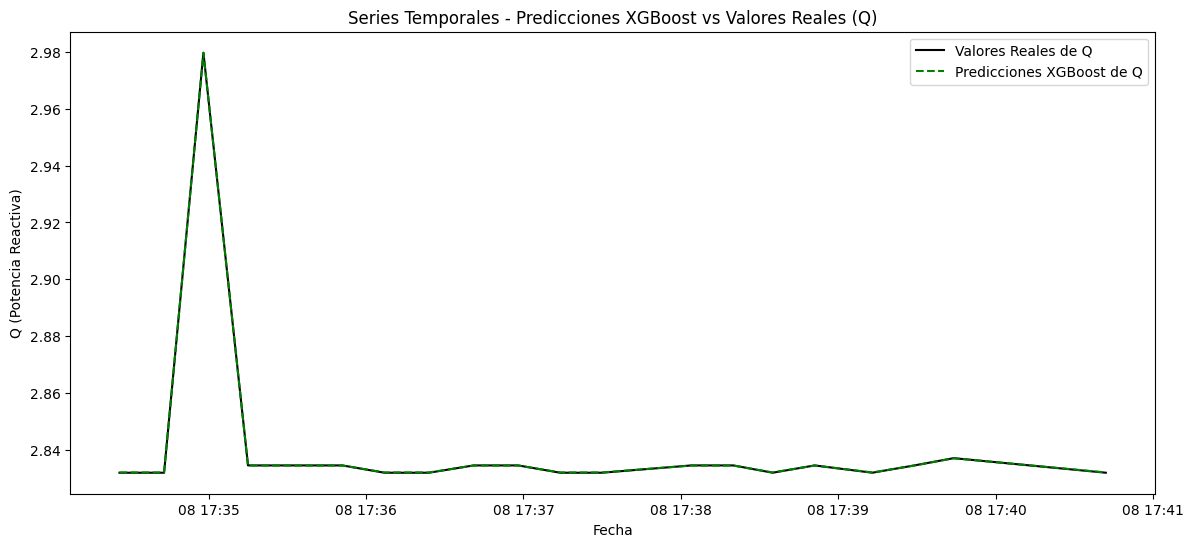

In [38]:
# Gráfica de series temporales del modelo XGBoost para Q
plt.figure(figsize=(14, 6))
plt.plot(combined_df['created_at'].iloc[-len(y_Q_test):], y_Q_test, label='Valores Reales de Q', color='black')
plt.plot(combined_df['created_at'].iloc[-len(y_Q_test):], y_Q_pred_xgb, label='Predicciones XGBoost de Q', color='green', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel('Q (Potencia Reactiva)')
plt.title('Series Temporales - Predicciones XGBoost vs Valores Reales (Q)')
plt.legend()
plt.show()


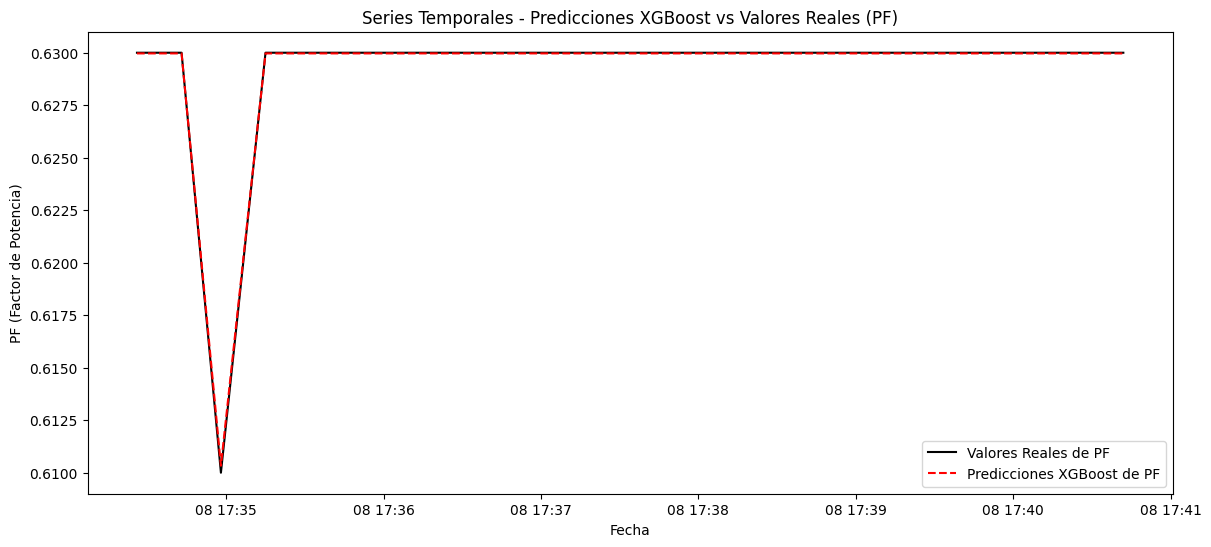

In [48]:
# Gráfica de series temporales del modelo XGBoost para PF
plt.figure(figsize=(14, 6))
plt.plot(combined_df['created_at'].iloc[-len(y_PF_test):], y_PF_test, label='Valores Reales de PF', color='black')
plt.plot(combined_df['created_at'].iloc[-len(y_PF_test):], y_PF_pred_xgb, label='Predicciones XGBoost de PF', color='red', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel('PF (Factor de Potencia)')
plt.title('Series Temporales - Predicciones XGBoost vs Valores Reales (PF)')
plt.legend()
plt.show()


Estas secciones opcionales grafican las series temporales de las predicciones y los valores reales para la potencia reactiva (Q) y el factor de potencia (PF), proporcionando una visualización más detallada del rendimiento del modelo a lo largo del tiempo.

1. Interpolación de Datos
Vamos a utilizar la interpolación para generar más puntos de datos y luego entrenar los modelos con estos datos aumentados.

Interpolación y Aumento de Datos

In [49]:
import numpy as np

# Incrementar el número de puntos a generar por interpolación
num_new_points = 1000

# Interpolación lineal para generar nuevos puntos
def interpolate_data(X, y, num_new_points):
    X_new = []
    y_new = []
    for i in range(len(X) - 1):
        for j in range(1, num_new_points + 1):
            alpha = j / (num_new_points + 1)
            X_new.append(X[i] * (1 - alpha) + X[i + 1] * alpha)
            y_new.append(y[i] * (1 - alpha) + y[i + 1] * alpha)
    return np.array(X_new), np.array(y_new)

# Generar nuevos puntos para Q
X_train_new, y_Q_train_new = interpolate_data(X_train_scaled, y_Q_train.values, num_new_points)

# Generar nuevos puntos para PF
X_train_pf_new, y_PF_train_new = interpolate_data(X_train_scaled, y_PF_train.values, num_new_points)

print("Nuevas dimensiones de los conjuntos de datos aumentados:")
print(X_train_new.shape, y_Q_train_new.shape, X_train_pf_new.shape, y_PF_train_new.shape)


Nuevas dimensiones de los conjuntos de datos aumentados:
(78000, 9) (78000,) (78000, 9) (78000,)


Entrenamiento de Modelos con Datos Aumentados

Entrenamiento y Evaluación de SVR

In [50]:
# Entrenar el modelo SVR con datos aumentados para predecir Q
svr_model.fit(X_train_new, y_Q_train_new)
y_Q_pred_svr_new = svr_model.predict(X_test_scaled)
mse_svr_new = mean_squared_error(y_Q_test, y_Q_pred_svr_new)
r2_svr_new = r2_score(y_Q_test, y_Q_pred_svr_new)

print("Resultados del modelo SVR con datos aumentados para predecir Q:")
print(f"MSE: {mse_svr_new}")
print(f"R²: {r2_svr_new}")

# Entrenar el modelo SVR con datos aumentados para predecir PF
svr_model_pf.fit(X_train_pf_new, y_PF_train_new)
y_PF_pred_svr_new = svr_model_pf.predict(X_test_scaled)
mse_svr_pf_new = mean_squared_error(y_PF_test, y_PF_pred_svr_new)
r2_svr_pf_new = r2_score(y_PF_test, y_PF_pred_svr_new)

print("Resultados del modelo SVR con datos aumentados para predecir PF:")
print(f"MSE: {mse_svr_pf_new}")
print(f"R²: {r2_svr_pf_new}")


Resultados del modelo SVR con datos aumentados para predecir Q:
MSE: 0.005611400829064185
R²: -4.49906760278179
Resultados del modelo SVR con datos aumentados para predecir PF:
MSE: 0.0001000000000000002
R²: -4.263157894736844


Entrenamiento y Evaluación de XGBoost

In [51]:
# Entrenar el modelo XGBoost con datos aumentados para predecir Q
xgb_model.fit(X_train_new, y_Q_train_new)
y_Q_pred_xgb_new = xgb_model.predict(X_test_scaled)
mse_xgb_new = mean_squared_error(y_Q_test, y_Q_pred_xgb_new)
r2_xgb_new = r2_score(y_Q_test, y_Q_pred_xgb_new)

print("Resultados del modelo XGBoost con datos aumentados para predecir Q:")
print(f"MSE: {mse_xgb_new}")
print(f"R²: {r2_xgb_new}")

# Entrenar el modelo XGBoost con datos aumentados para predecir PF
xgb_model_pf.fit(X_train_pf_new, y_PF_train_new)
y_PF_pred_xgb_new = xgb_model_pf.predict(X_test_scaled)
mse_xgb_pf_new = mean_squared_error(y_PF_test, y_PF_pred_xgb_new)
r2_xgb_pf_new = r2_score(y_PF_test, y_PF_pred_xgb_new)

print("Resultados del modelo XGBoost con datos aumentados para predecir PF:")
print(f"MSE: {mse_xgb_pf_new}")
print(f"R²: {r2_xgb_pf_new}")


Resultados del modelo XGBoost con datos aumentados para predecir Q:
MSE: 3.237532441277346e-08
R²: 0.9999682727890894
Resultados del modelo XGBoost con datos aumentados para predecir PF:
MSE: 4.024201757606927e-11
R²: 0.9999978819990749


Gráficas de Resultados con Datos Aumentados

Gráfica de Resultados para Q

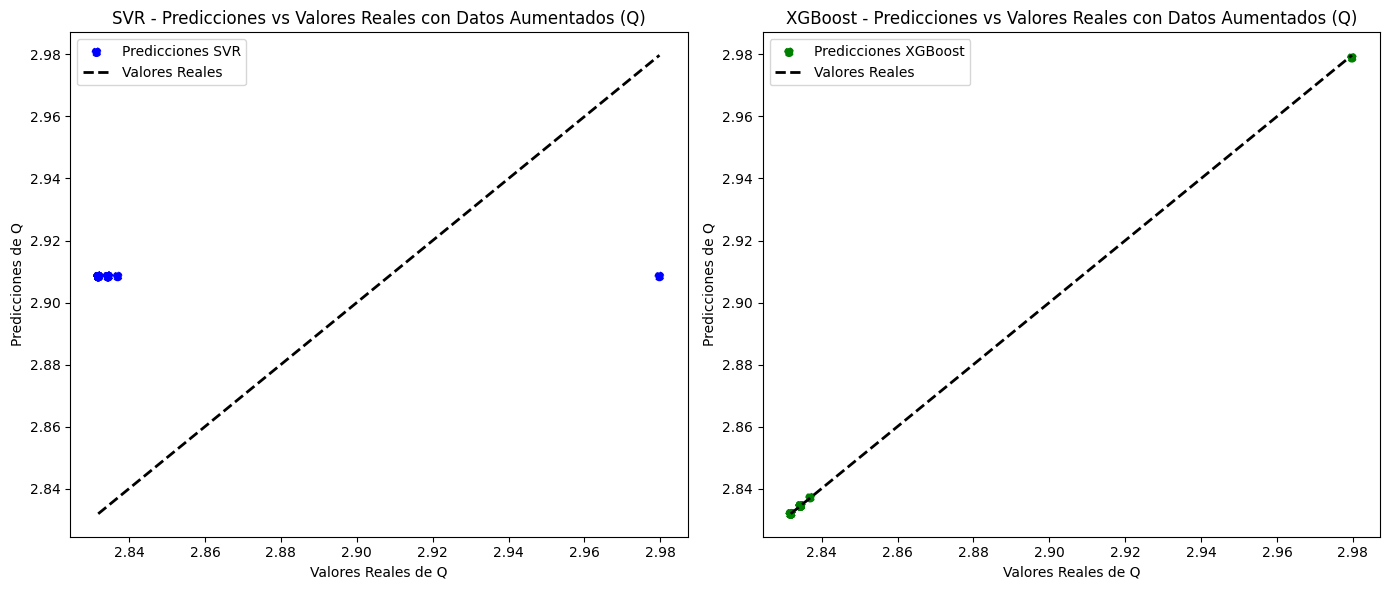

In [56]:
import matplotlib.pyplot as plt

# Gráfica de resultados del modelo SVR con datos aumentados para Q
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_Q_test, y_Q_pred_svr_new, color='blue', label='Predicciones SVR',  linestyle='dashed')
plt.plot([y_Q_test.min(), y_Q_test.max()], [y_Q_test.min(), y_Q_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de Q')
plt.ylabel('Predicciones de Q')
plt.title('SVR - Predicciones vs Valores Reales con Datos Aumentados (Q)')
plt.legend()

# Gráfica de resultados del modelo XGBoost con datos aumentados para Q
plt.subplot(1, 2, 2)
plt.scatter(y_Q_test, y_Q_pred_xgb_new, color='green', label='Predicciones XGBoost', linestyle='dashed')
plt.plot([y_Q_test.min(), y_Q_test.max()], [y_Q_test.min(), y_Q_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de Q')
plt.ylabel('Predicciones de Q')
plt.title('XGBoost - Predicciones vs Valores Reales con Datos Aumentados (Q)')
plt.legend()

plt.tight_layout()
plt.show()


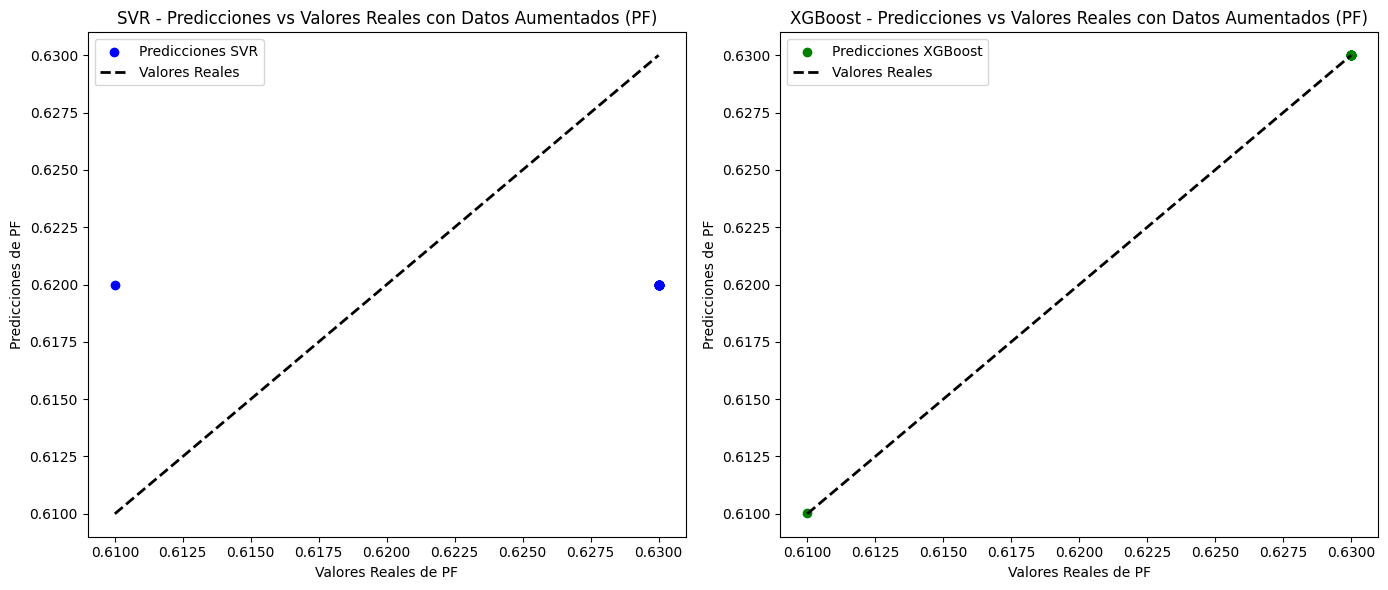

In [54]:
# Gráfica de resultados del modelo SVR con datos aumentados para PF
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_PF_test, y_PF_pred_svr_new, color='blue', label='Predicciones SVR')
plt.plot([y_PF_test.min(), y_PF_test.max()], [y_PF_test.min(), y_PF_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de PF')
plt.ylabel('Predicciones de PF')
plt.title('SVR - Predicciones vs Valores Reales con Datos Aumentados (PF)')
plt.legend()

# Gráfica de resultados del modelo XGBoost con datos aumentados para PF
plt.subplot(1, 2, 2)
plt.scatter(y_PF_test, y_PF_pred_xgb_new, color='green', label='Predicciones XGBoost')
plt.plot([y_PF_test.min(), y_PF_test.max()], [y_PF_test.min(), y_PF_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de PF')
plt.ylabel('Predicciones de PF')
plt.title('XGBoost - Predicciones vs Valores Reales con Datos Aumentados (PF)')
plt.legend()

plt.tight_layout()
plt.show()


Gráficas de Residuales //
Gráfica de Residuales para Q

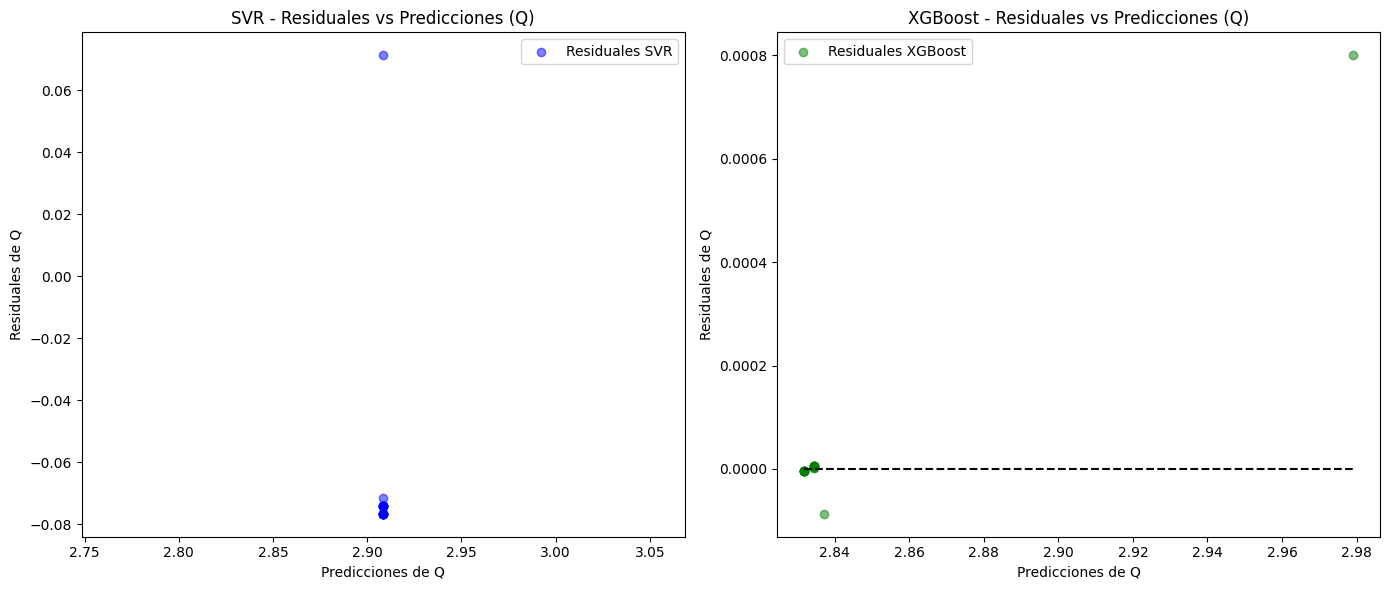

In [58]:
# Calcular residuales para Q
residuals_svr_q = y_Q_test - y_Q_pred_svr_new
residuals_xgb_q = y_Q_test - y_Q_pred_xgb_new

# Gráfica de residuales del modelo SVR para Q
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_Q_pred_svr_new, residuals_svr_q, color='blue', alpha=0.5, label='Residuales SVR')
plt.hlines(y=0, xmin=y_Q_pred_svr_new.min(), xmax=y_Q_pred_svr_new.max(), color='black', linestyles='dashed')
plt.xlabel('Predicciones de Q')
plt.ylabel('Residuales de Q')
plt.title('SVR - Residuales vs Predicciones (Q)')
plt.legend()

# Gráfica de residuales del modelo XGBoost para Q
plt.subplot(1, 2, 2)
plt.scatter(y_Q_pred_xgb_new, residuals_xgb_q, color='green', alpha=0.5, label='Residuales XGBoost')
plt.hlines(y=0, xmin=y_Q_pred_xgb_new.min(), xmax=y_Q_pred_xgb_new.max(), color='black', linestyles='dashed')
plt.xlabel('Predicciones de Q')
plt.ylabel('Residuales de Q')
plt.title('XGBoost - Residuales vs Predicciones (Q)')
plt.legend()

plt.tight_layout()
plt.show()


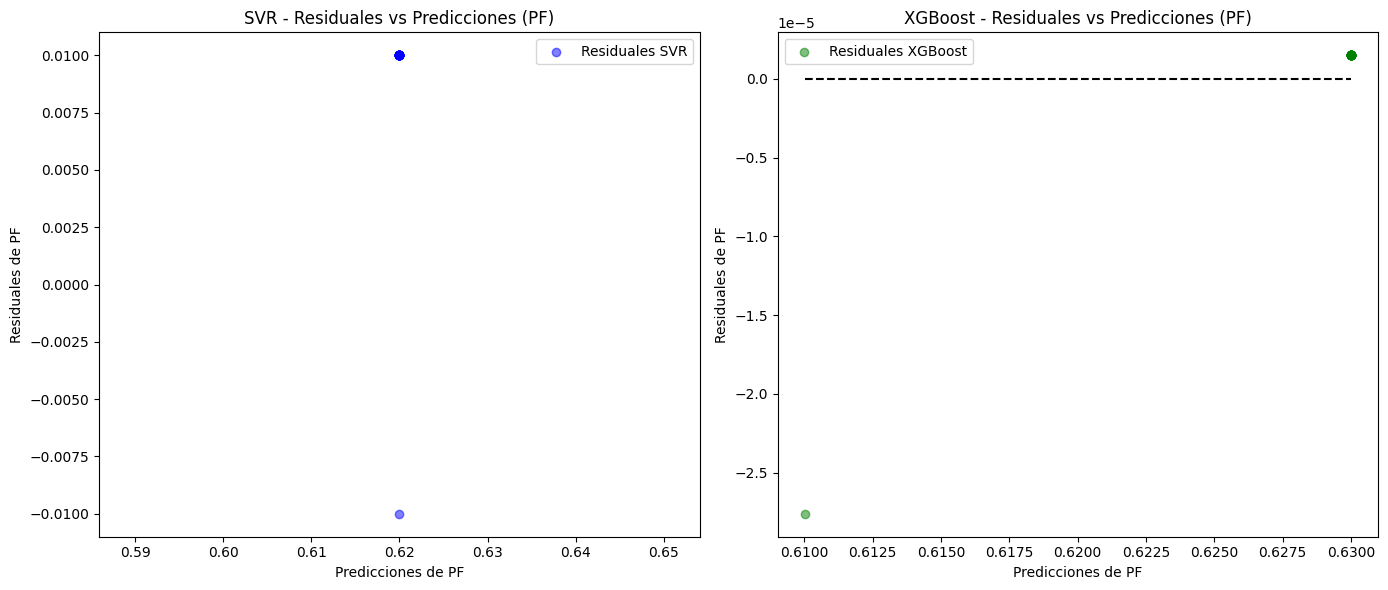

In [59]:
# Calcular residuales para PF
residuals_svr_pf = y_PF_test - y_PF_pred_svr_new
residuals_xgb_pf = y_PF_test - y_PF_pred_xgb_new

# Gráfica de residuales del modelo SVR para PF
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_PF_pred_svr_new, residuals_svr_pf, color='blue', alpha=0.5, label='Residuales SVR')
plt.hlines(y=0, xmin=y_PF_pred_svr_new.min(), xmax=y_PF_pred_svr_new.max(), color='black', linestyles='dashed')
plt.xlabel('Predicciones de PF')
plt.ylabel('Residuales de PF')
plt.title('SVR - Residuales vs Predicciones (PF)')
plt.legend()

# Gráfica de residuales del modelo XGBoost para PF
plt.subplot(1, 2, 2)
plt.scatter(y_PF_pred_xgb_new, residuals_xgb_pf, color='green', alpha=0.5, label='Residuales XGBoost')
plt.hlines(y=0, xmin=y_PF_pred_xgb_new.min(), xmax=y_PF_pred_xgb_new.max(), color='black', linestyles='dashed')
plt.xlabel('Predicciones de PF')
plt.ylabel('Residuales de PF')
plt.title('XGBoost - Residuales vs Predicciones (PF)')
plt.legend()

plt.tight_layout()
plt.show()


Validación Cruzada en Modelos

In [60]:
from sklearn.model_selection import cross_val_score

# Características y etiquetas
X = combined_df[features]
y_Q = combined_df[target_Q]
y_PF = combined_df[target_PF]

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir etiquetas a arrays de numpy
y_Q = y_Q.values
y_PF = y_PF.values


In [61]:
# Validación cruzada para SVR prediciendo Q
svr_model = SVR()
scores_svr_q = cross_val_score(svr_model, X_scaled, y_Q, cv=5, scoring='r2')
print("Validación cruzada SVR para predecir Q:")
print("Scores:", scores_svr_q)
print("Mean R²:", scores_svr_q.mean())
print("Standard Deviation:", scores_svr_q.std())

# Validación cruzada para SVR prediciendo PF
scores_svr_pf = cross_val_score(svr_model, X_scaled, y_PF, cv=5, scoring='r2')
print("\nValidación cruzada SVR para predecir PF:")
print("Scores:", scores_svr_pf)
print("Mean R²:", scores_svr_pf.mean())
print("Standard Deviation:", scores_svr_pf.std())


Validación cruzada SVR para predecir Q:
Scores: [-2.78191750e+28 -6.90485438e+03 -4.14995300e+03 -4.24170233e+00
 -7.03960667e-02]
Mean R²: -5.563835006844851e+27
Standard Deviation: 1.1127670013689702e+28

Validación cruzada SVR para predecir PF:
Scores: [-8.11296384e+27 -8.11296384e+27 -8.11296384e+27 -4.26315789e+00
 -7.44047619e-02]
Mean R²: -4.8677783048764104e+27
Standard Deviation: 3.974524342645751e+27


Random Forest

Preparación de Datos

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Características y etiquetas
features = ['field1_x', 'field2_x', 'field3_x', 'field1_y', 'field2_y', 'field3_y', 'field4', 'field5', 'field6']
target_Q = 'field7'
target_PF = 'field6'

X = combined_df[features]
y_Q = combined_df[target_Q]
y_PF = combined_df[target_PF]

# Dividir los datos en conjuntos de entrenamiento y prueba (75% - 25%)
X_train, X_test, y_Q_train, y_Q_test = train_test_split(X, y_Q, test_size=0.25, random_state=42)
X_train_pf, X_test_pf, y_PF_train, y_PF_test = train_test_split(X, y_PF, test_size=0.25, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_pf_scaled = scaler.fit_transform(X_train_pf)
X_test_pf_scaled = scaler.transform(X_test_pf)


Entrenamiento y Evaluación de Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo Random Forest para predecir Q
rf_model_q = RandomForestRegressor(random_state=42)
rf_model_q.fit(X_train_scaled, y_Q_train)

# Predecir en el conjunto de prueba
y_Q_pred_rf = rf_model_q.predict(X_test_scaled)

# Evaluar el modelo Random Forest para Q
mse_rf_q = mean_squared_error(y_Q_test, y_Q_pred_rf)
r2_rf_q = r2_score(y_Q_test, y_Q_pred_rf)

print("Resultados del modelo Random Forest para predecir Q:")
print(f"MSE: {mse_rf_q}")
print(f"R²: {r2_rf_q}")

# Entrenar el modelo Random Forest para predecir PF
rf_model_pf = RandomForestRegressor(random_state=42)
rf_model_pf.fit(X_train_pf_scaled, y_PF_train)

# Predecir en el conjunto de prueba
y_PF_pred_rf = rf_model_pf.predict(X_test_pf_scaled)

# Evaluar el modelo Random Forest para PF
mse_rf_pf = mean_squared_error(y_PF_test, y_PF_pred_rf)
r2_rf_pf = r2_score(y_PF_test, y_PF_pred_rf)

print("\nResultados del modelo Random Forest para predecir PF:")
print(f"MSE: {mse_rf_pf}")
print(f"R²: {r2_rf_pf}")


Resultados del modelo Random Forest para predecir Q:
MSE: 8.082892096003973e-07
R²: 0.9990218486784468

Resultados del modelo Random Forest para predecir PF:
MSE: 7.999999999969815e-09
R²: 0.9994791666666686


Visualización de Resultados
Gráfica de Predicciones vs Valores Reales

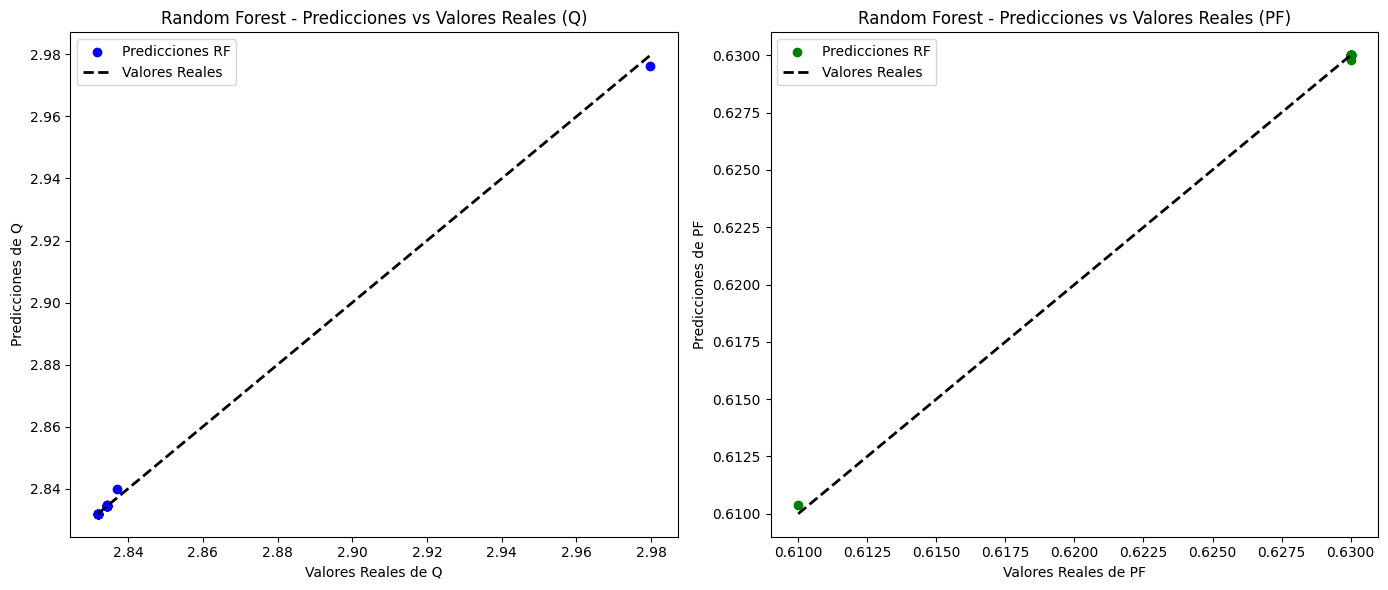

In [64]:
import matplotlib.pyplot as plt

# Gráfica de resultados del modelo Random Forest para Q
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_Q_test, y_Q_pred_rf, color='blue', label='Predicciones RF')
plt.plot([y_Q_test.min(), y_Q_test.max()], [y_Q_test.min(), y_Q_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de Q')
plt.ylabel('Predicciones de Q')
plt.title('Random Forest - Predicciones vs Valores Reales (Q)')
plt.legend()

# Gráfica de resultados del modelo Random Forest para PF
plt.subplot(1, 2, 2)
plt.scatter(y_PF_test, y_PF_pred_rf, color='green', label='Predicciones RF')
plt.plot([y_PF_test.min(), y_PF_test.max()], [y_PF_test.min(), y_PF_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de PF')
plt.ylabel('Predicciones de PF')
plt.title('Random Forest - Predicciones vs Valores Reales (PF)')
plt.legend()

plt.tight_layout()
plt.show()


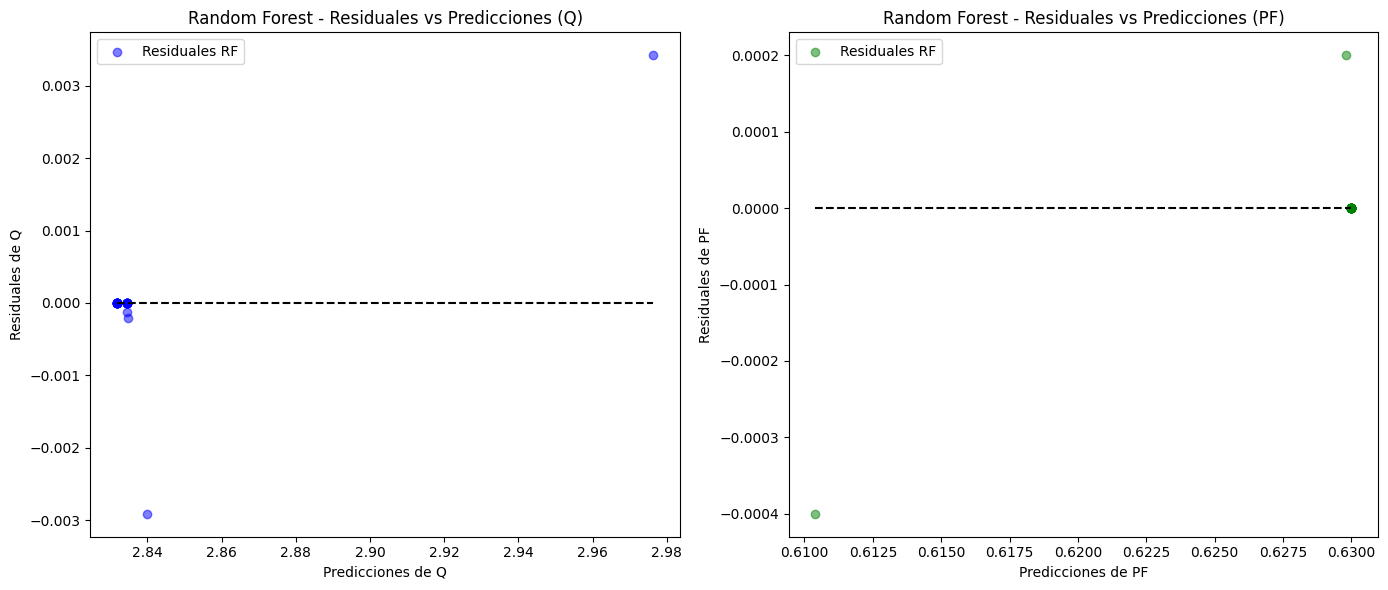

In [65]:
# Calcular residuales para Q
residuals_rf_q = y_Q_test - y_Q_pred_rf

# Calcular residuales para PF
residuals_rf_pf = y_PF_test - y_PF_pred_rf

# Gráfica de residuales del modelo Random Forest para Q
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_Q_pred_rf, residuals_rf_q, color='blue', alpha=0.5, label='Residuales RF')
plt.hlines(y=0, xmin=y_Q_pred_rf.min(), xmax=y_Q_pred_rf.max(), color='black', linestyles='dashed')
plt.xlabel('Predicciones de Q')
plt.ylabel('Residuales de Q')
plt.title('Random Forest - Residuales vs Predicciones (Q)')
plt.legend()

# Gráfica de residuales del modelo Random Forest para PF
plt.subplot(1, 2, 2)
plt.scatter(y_PF_pred_rf, residuals_rf_pf, color='green', alpha=0.5, label='Residuales RF')
plt.hlines(y=0, xmin=y_PF_pred_rf.min(), xmax=y_PF_pred_rf.max(), color='black', linestyles='dashed')
plt.xlabel('Predicciones de PF')
plt.ylabel('Residuales de PF')
plt.title('Random Forest - Residuales vs Predicciones (PF)')
plt.legend()

plt.tight_layout()
plt.show()


Interpolación y Aumento de Datos con random Forest 


In [74]:
import numpy as np

# Incrementar el número de puntos a generar por interpolación
num_new_points = 1000

# Interpolación lineal para generar nuevos puntos
def interpolate_data(X, y, num_new_points):
    X_new = []
    y_new = []
    for i in range(len(X) - 1):
        for j in range(1, num_new_points + 1):
            alpha = j / (num_new_points + 1)
            X_new.append(X[i] * (1 - alpha) + X[i + 1] * alpha)
            y_new.append(y[i] * (1 - alpha) + y[i + 1] * alpha)
    return np.array(X_new), np.array(y_new)

# Generar nuevos puntos para Q
X_train_new, y_Q_train_new = interpolate_data(X_train_scaled, y_Q_train.values, num_new_points)

# Generar nuevos puntos para PF
X_train_pf_new, y_PF_train_new = interpolate_data(X_train_pf_scaled, y_PF_train.values, num_new_points)

print("Nuevas dimensiones de los conjuntos de datos aumentados:")
print(X_train_new.shape, y_Q_train_new.shape, X_train_pf_new.shape, y_PF_train_new.shape)


Nuevas dimensiones de los conjuntos de datos aumentados:
(73000, 9) (73000,) (73000, 9) (73000,)


Entrenamiento y Evaluación de Random Forest con Datos Aumentados
Entrenamiento y Evaluación de Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo Random Forest para predecir Q
rf_model_q = RandomForestRegressor(random_state=42)
rf_model_q.fit(X_train_new, y_Q_train_new)

# Predecir en el conjunto de prueba
y_Q_pred_rf = rf_model_q.predict(X_test_scaled)

# Evaluar el modelo Random Forest para Q
mse_rf_q = mean_squared_error(y_Q_test, y_Q_pred_rf)
r2_rf_q = r2_score(y_Q_test, y_Q_pred_rf)

print("Resultados del modelo Random Forest para predecir Q:")
print(f"MSE: {mse_rf_q}")
print(f"R²: {r2_rf_q}")

# Entrenar el modelo Random Forest para predecir PF
rf_model_pf = RandomForestRegressor(random_state=42)
rf_model_pf.fit(X_train_pf_new, y_PF_train_new)

# Predecir en el conjunto de prueba
y_PF_pred_rf = rf_model_pf.predict(X_test_pf_scaled)

# Evaluar el modelo Random Forest para PF
mse_rf_pf = mean_squared_error(y_PF_test, y_PF_pred_rf)
r2_rf_pf = r2_score(y_PF_test, y_PF_pred_rf)

print("\nResultados del modelo Random Forest para predecir PF:")
print(f"MSE: {mse_rf_pf}")
print(f"R²: {r2_rf_pf}")


Resultados del modelo Random Forest para predecir Q:
MSE: 5.480349221441067e-09
R²: 0.9999933679544774

Resultados del modelo Random Forest para predecir PF:
MSE: 1.5968049426156036e-15
R²: 0.9999999998960414


Visualización de Resultados con Datos Aumentados
Gráfica de Predicciones vs Valores Reales

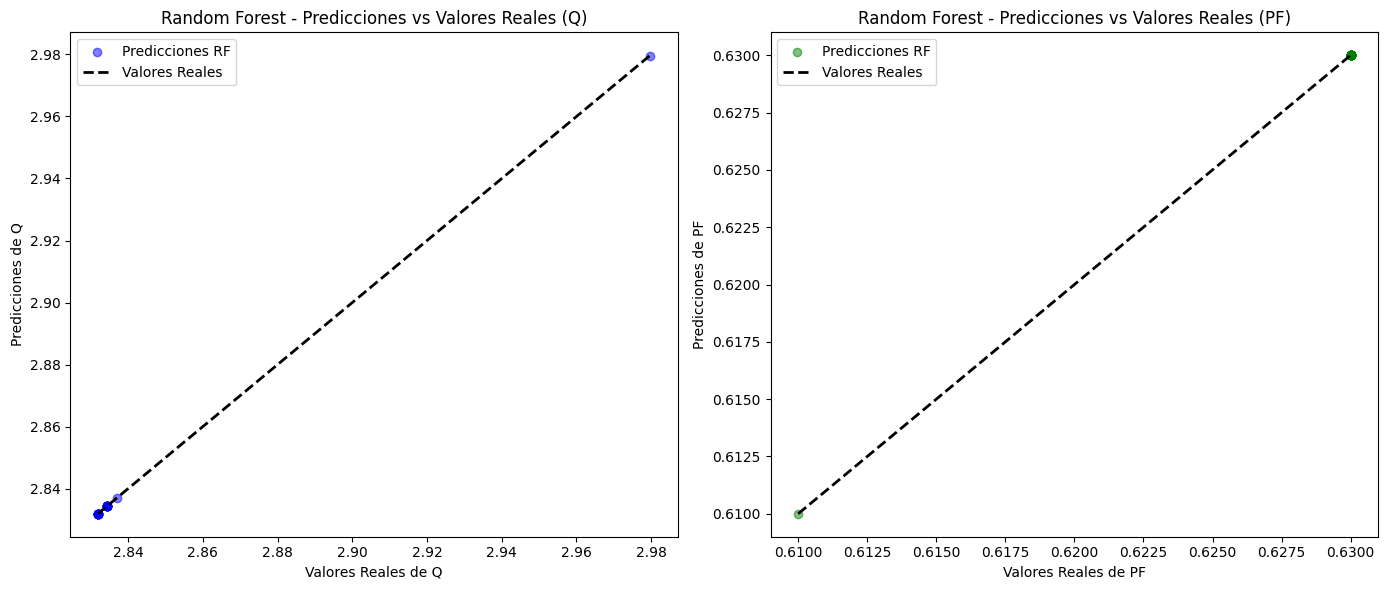

In [76]:
import matplotlib.pyplot as plt

# Gráfica de resultados del modelo Random Forest para Q
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_Q_test, y_Q_pred_rf, color='blue', label='Predicciones RF', alpha=0.5)
plt.plot([y_Q_test.min(), y_Q_test.max()], [y_Q_test.min(), y_Q_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de Q')
plt.ylabel('Predicciones de Q')
plt.title('Random Forest - Predicciones vs Valores Reales (Q)')
plt.legend()

# Gráfica de resultados del modelo Random Forest para PF
plt.subplot(1, 2, 2)
plt.scatter(y_PF_test, y_PF_pred_rf, color='green', label='Predicciones RF', alpha=0.5)
plt.plot([y_PF_test.min(), y_PF_test.max()], [y_PF_test.min(), y_PF_test.max()], 'k--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales de PF')
plt.ylabel('Predicciones de PF')
plt.title('Random Forest - Predicciones vs Valores Reales (PF)')
plt.legend()

plt.tight_layout()
plt.show()
